# Business Understanding

### Basically, expectation of the bank, which customer could be churn and how modelling data of customer of the bank. In line with this expectation, main objective detects customers that could be leave from there.

## Importing necessary libraries:

In [1]:
## Data Preparation Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


## Models Library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score,accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report,f1_score


## Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


## Other
import os
import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

Using TensorFlow backend.


## Reading the dataset:

In [2]:
churn_data  = pd.read_csv("Churn_Modelling.csv")

## First 5 rows of data

In [3]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.shape

(10000, 14)

## So, the data contains 10000 rows and 14 columns of which 'Exited' column is our target column

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of  14 columns and 10,000 rows. The following shows description of columns.

   #### RowNumberRow Numbers from 1 to 10000
   #### Customer ID: This attribute is unique and assume that primary key
   #### Surname: it belongs to surname of customer and string values
   #### Geography: it shows country of customer
   #### Gender: male/female
   #### Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the          customer debt high repayment capacity.
   #### Age: age of customers
   #### Tenure: The number of ages the customer is in the bank.
   #### Balance: Customer's money in the bank.
   #### Number of Products: Number of products owned by the customer.
   #### Credit Card: Whether the customer has a credit card
   #### Active Status: Customer's presence in the bank
   #### Estimated Salary: Customer's estimated salary
   #### Exited:  Binary flag 1 if the customer closed account with bank and 0 if the customer is retained [Churn or not]

## To avoid overfitting we have to Remove unneeded columns which are RowNumber, CustomerId, and Surname.

In [6]:
churn_data = churn_data.drop(columns=["RowNumber","CustomerId","Surname"])

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Missing values checking

In [8]:
pd.DataFrame(churn_data.isnull().sum(),columns=["Count"])

,Count
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


## Now that we have seen there no missing value in the dataset, so we are not going to do any imputation techniques.

## Now we will check how the target value["Exited"] is distributed.

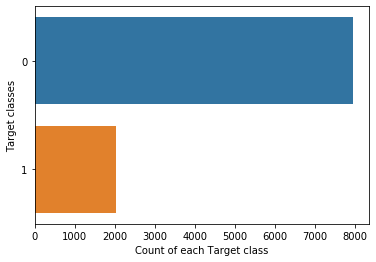

In [9]:
sns.countplot(y=churn_data.Exited ,data=churn_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [10]:
pd.DataFrame(churn_data['Exited'].value_counts(normalize=True).mul(100).round(0).astype(str) + '%')

,Exited
0,80.0%
1,20.0%


## The customer closed the account with the bank[1] and the customer is retained in the bank [0] is distributed with  20% and 80%. so, in this case, we are not going to perform any undersampling and oversampling technique.

## Outlier handling  

## Now, that we have split the dataset into dependent and independent features let us now write a function to handle the outliers in the data. 

In [11]:
def outlier_impute(dataf):
    for col_name in churn_data.select_dtypes(include=np.number).drop(columns=['Exited']).columns[0:]:
        print(col_name)
        q1 = dataf[col_name].quantile(0.25)
        q3 = dataf[col_name].quantile(0.75)
        iqr = q3 - q1

        low = q1-1.5*iqr
        high = q3+1.5*iqr 
        dataf.loc[(dataf[col_name] < low) | (dataf[col_name] > high), col_name] = dataf[col_name].median()
    return dataf

## The function computes whether a value is an outlier or not but using the concept of box plot. 

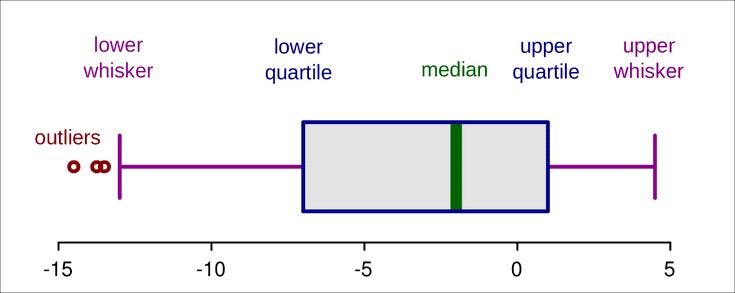

## Where anything below the lower whisker and anything above the upper whisker are outliers. We then impute the outliers with the median of that feature. 

In [12]:
churn_data = outlier_impute(churn_data)

CreditScore
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary


## Good to go!

## Exploratory Data Analysis 

#### Exploratory Data Analysis refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#### It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.

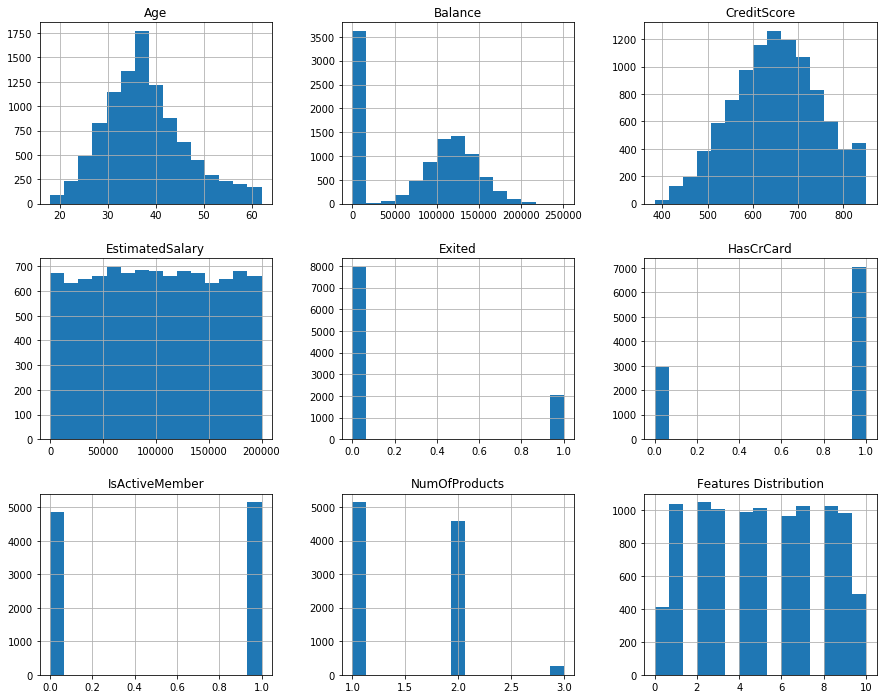

In [13]:
churn_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

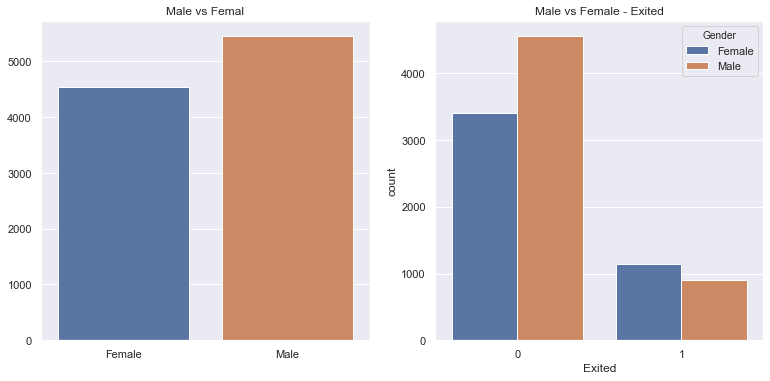

In [14]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3,3,1)
ax1. set_title("Male vs Femal")

ax2 = fig.add_subplot(3,3,2)
ax2. set_title("Male vs Female - Exited")

sns.barplot(x = churn_data['Gender'].value_counts().sort_index().index,y = churn_data['Gender'].value_counts().sort_index().values, ax= ax1 )
sns.countplot(x = 'Exited', hue = 'Gender', data = churn_data, ax = ax2)

## From the given dataset, 
#### Most customers are retained within the bank.
#### when compared to male customers, Most of the female customers are closed there account in the bank.
#### Most of the male customers are continues there account within the bank.


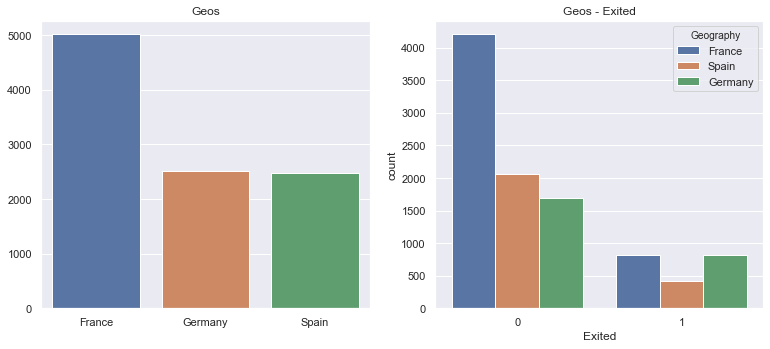

In [15]:
fig = plt.figure(figsize = (20,18))
ax3 = fig.add_subplot(3,3,1)
ax3.set_title("Geos")

ax4 = fig.add_subplot(3,3,2)
ax4.set_title("Geos - Exited")

sns.barplot(x = churn_data['Geography'].value_counts().sort_index().index,y = churn_data['Geography'].value_counts().sort_index().values, ax = ax3)
sns.countplot(x = 'Exited', hue = 'Geography', data = churn_data, ax = ax4)

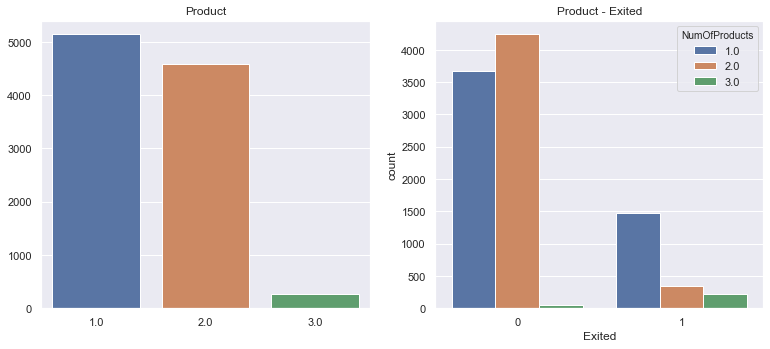

In [16]:
fig = plt.figure(figsize = (20,18))
ax5 = fig.add_subplot(3,3,1)
ax5.set_title("Product")

ax6 = fig.add_subplot(3,3,2)
ax6.set_title("Product - Exited")

sns.barplot(x = churn_data['NumOfProducts'].value_counts().sort_index().index,y = churn_data['NumOfProducts'].value_counts().sort_index().values, ax = ax5)
sns.countplot(x = 'Exited', hue = 'NumOfProducts', data = churn_data, ax = ax6)

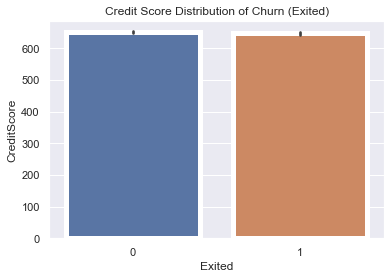

In [17]:
# Exited -- CreditScore
sns.barplot( x=churn_data["Exited"], y=churn_data["CreditScore"], linewidth=5)
plt.title("Credit Score Distribution of Churn (Exited)")
plt.show()

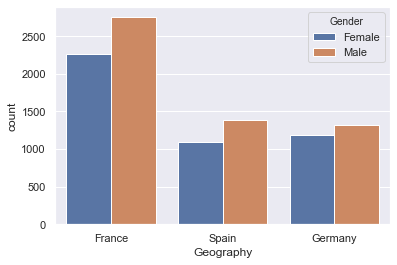

In [18]:
sns.countplot(x='Geography',hue='Gender',data=churn_data)

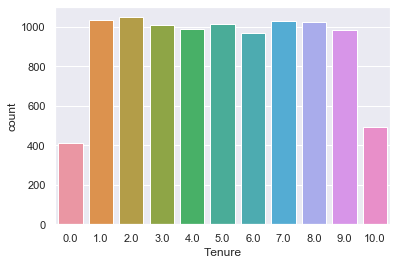

In [19]:
sns.countplot(x='Tenure',data=churn_data)

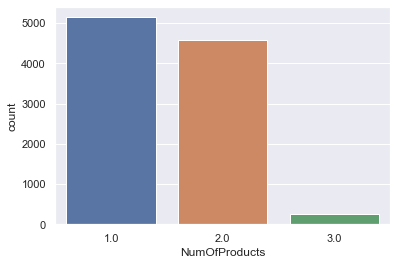

In [20]:
sns.countplot(x='NumOfProducts',data=churn_data)

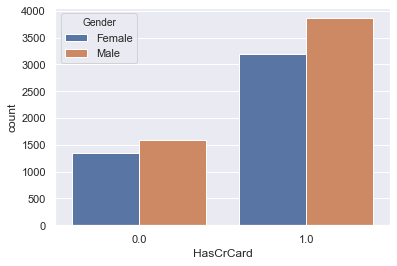

In [21]:
sns.countplot(x='HasCrCard',hue='Gender',data=churn_data)

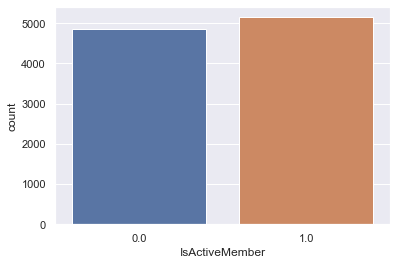

In [22]:
sns.countplot(x='IsActiveMember',data=churn_data)

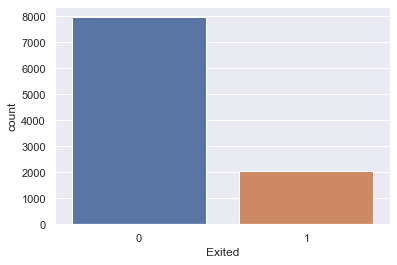

In [23]:
sns.countplot(x='Exited',data=churn_data)

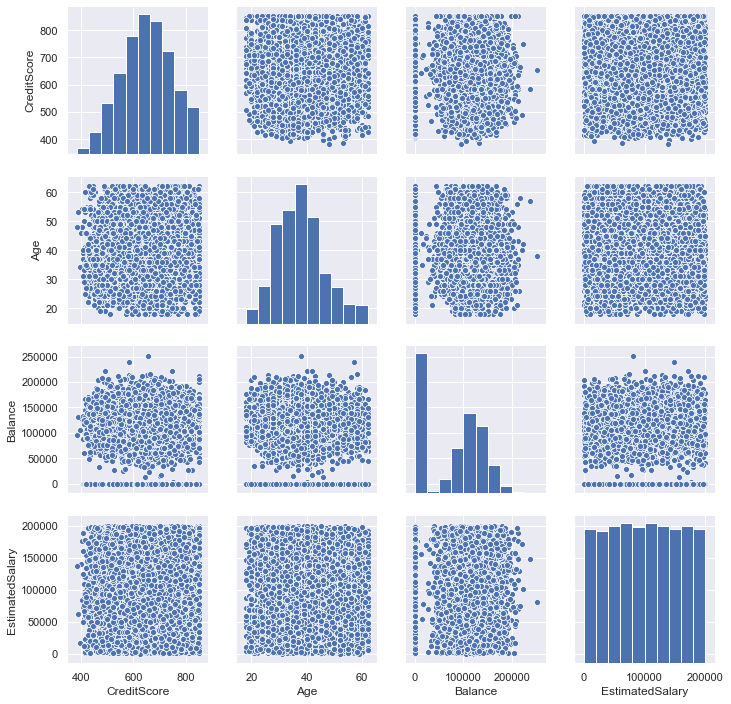

In [24]:
#'CreditScore','Age','Balance','EstimatedSalary'
sns.pairplot(x_vars=['CreditScore','Age','Balance','EstimatedSalary'],
             y_vars=['CreditScore','Age','Balance','EstimatedSalary'],
             data=churn_data)

### Feature Engineering

## Correlation Check: 
####      Correlation is the method of checking the mutual relationship between the two variables. The correlation between the independent and dependent variables is highly desirable. Correlation varies from -1 to 1, so any correlation value closer to 0 would essentially give us no information. So, we shall write a function that finds the correlation of each feature with the target variable ‘y’ and remove variables close to 0. And again we leave the threshold to your choice.


In [25]:
churn_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.012997,-0.000650,0.007074,0.010529,-0.003942,0.023596,0.001619,-0.018298
Age,-0.012997,1.000000,-0.010127,0.040572,-0.062718,-0.016067,0.015097,-0.004350,0.352348
Tenure,-0.000650,-0.010127,1.000000,-0.012254,0.010957,0.022583,-0.028362,0.007784,-0.014001
Balance,0.007074,0.040572,-0.012254,1.000000,-0.330416,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.010529,-0.062718,0.010957,-0.330416,1.000000,0.004953,0.012234,0.012350,-0.115172
HasCrCard,-0.003942,-0.016067,0.022583,-0.014858,0.004953,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.023596,0.015097,-0.028362,-0.010084,0.012234,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.001619,-0.004350,0.007784,0.012797,0.012350,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.018298,0.352348,-0.014001,0.118533,-0.115172,-0.007138,-0.156128,0.012097,1.000000


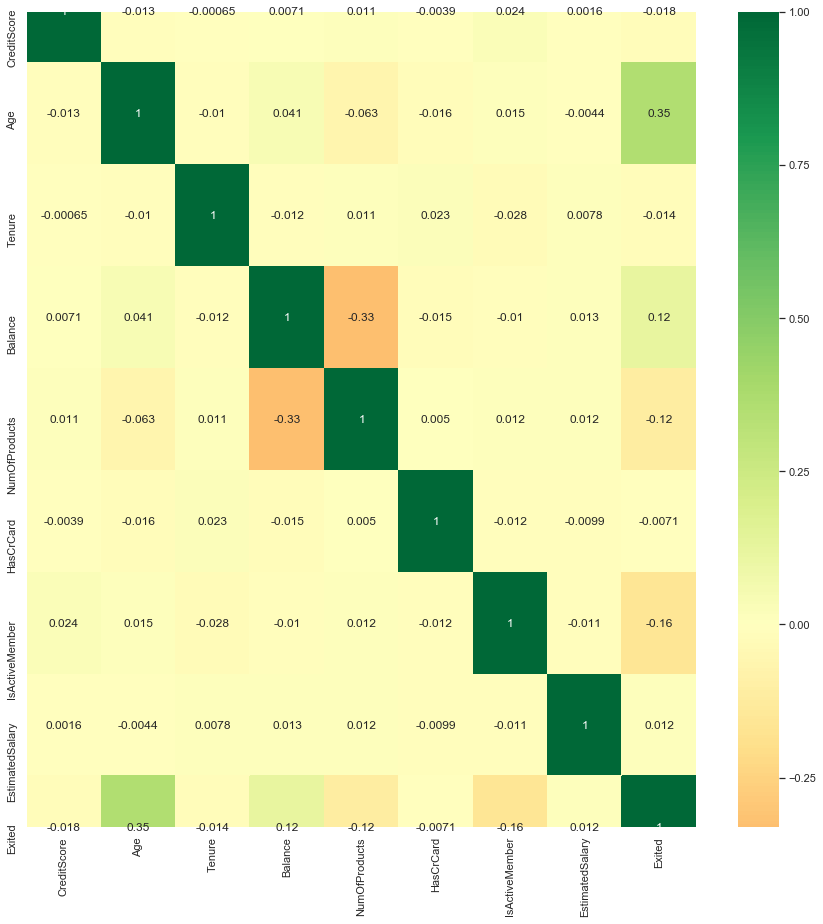

In [26]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [27]:
def corr_drop(df,target,thresh = 0.1):
    corr_matrix = df.corr()
    data = corr_matrix["Exited"].sort_values(ascending=False)
    corr_matrix_withtarget = pd.DataFrame(columns =['features','corr'])
    corr_matrix_withtarget['features'] = corr_matrix["Exited"].sort_values(ascending=False).index
    corr_matrix_withtarget['corr'] = corr_matrix["Exited"].sort_values(ascending=False).values
    feat_todrop = []
    for i in range(0,len(corr_matrix_withtarget)):
        if(corr_matrix_withtarget['corr'][i] < thresh and corr_matrix_withtarget['corr'][i] > -(thresh)):
            feat_todrop.append(corr_matrix_withtarget['features'][i])
    for i in feat_todrop:
        print("dropping {} with correlation to y {}".format(corr_matrix_withtarget.loc[corr_matrix_withtarget['features'] == i]['features'].values[0],corr_matrix_withtarget.loc[corr_matrix_withtarget['features'] == i]['corr'].values[0]))
        
            
    df = df.drop(columns = feat_todrop,axis = 1)
    return df

## So before we apply this function to our dataframe remember we dropped the target variable from the dataframe. So lets concat it again with the dataframe. 

In [28]:
churn_data =corr_drop(churn_data,churn_data['Exited'])

dropping EstimatedSalary with correlation to y 0.012096861026845011
dropping HasCrCard with correlation to y -0.007137765603039506
dropping Tenure with correlation to y -0.014000612253444792
dropping CreditScore with correlation to y -0.018297815896673356


## Performing one – hot encoding:

In [29]:
def one_hot(df):
    data_column_category = df.select_dtypes(exclude=[np.number]).columns
    data_column_Integer = df.columns.difference(data_column_category)
    df_integer = df[data_column_Integer]
    df_category = df[data_column_category]
    df_onehot = pd.get_dummies(df_category)
    df = pd.concat([df_integer,df_onehot],axis = 1)
    return df


In [30]:
churn_data=one_hot(churn_data)

#### Writing a function that will take the dataframe as input, Identify categorical and numerical features and performs one hot for the same and returns the data frame with one hot encoded categorical variables. 

In [31]:
churn_data

,Age,Balance,Exited,IsActiveMember,NumOfProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42.0,0.00,1,1.0,1.0,1,0,0,1,0
1,41.0,83807.86,0,1.0,1.0,0,0,1,1,0
2,42.0,159660.80,1,0.0,3.0,1,0,0,1,0
3,39.0,0.00,0,0.0,2.0,1,0,0,1,0
4,43.0,125510.82,0,1.0,1.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,39.0,0.00,0,0.0,2.0,1,0,0,0,1
9996,35.0,57369.61,0,1.0,1.0,1,0,0,0,1
9997,36.0,0.00,1,1.0,1.0,1,0,0,1,0
9998,42.0,75075.31,1,0.0,2.0,0,1,0,0,1


In [32]:
churn_data.shape

(10000, 10)

## Model Building: 

## Ahh finally!! 
## This is the fun part of the whole process. As usual let us build a function for model building as well. We shall use F1 Score here as low error is undesirable in this case. 

In [33]:
x=churn_data.drop(columns=['Exited'])

In [34]:
y=churn_data['Exited']

In [35]:
std = StandardScaler()
X_std = std.fit_transform(x)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=1)

In [37]:
def roc_draw(test_X, test_Y,logreg,algName):
    logit_roc_auc = roc_auc_score(test_Y, logreg.predict(test_X))
    fpr, tpr, thresholds = roc_curve(test_Y, logreg.predict_proba(test_X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(algName)
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [38]:
f1_score_train=[];
f1_score_test=[];
algorithm_name=[];
def model_fit(alg,train_X,train_Y,test_X,test_Y,algName):
    #Fit the algorithm on the data
    alg.fit(train_X,train_Y)
    
    ### Predict training set:
    dtrain_predictions  = alg.predict(train_X);
    train_accuracy=accuracy_score(train_Y,dtrain_predictions)
    print(" Train Prediction  Accuracy :",train_accuracy)
    print(classification_report(train_Y,dtrain_predictions))
    
    ### Predict test set:
    dtest_predictions = alg.predict(test_X);
    test_accuracy=accuracy_score(test_Y,dtest_predictions)
    print(" Test Prediction Accuracy :",test_accuracy)
    print(classification_report(test_Y,dtest_predictions))
    
    ## Confusion Matrix
    cm = confusion_matrix(test_Y, dtest_predictions)
    p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    ## Roc Curve
    roc_draw(train_X, train_Y,alg,algName)
    
    f1_score_train.append(train_accuracy)
    f1_score_test.append(test_accuracy)
    algorithm_name.append(algName)

 Train Prediction  Accuracy : 0.8277142857142857
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5590
           1       0.66      0.30      0.41      1410

    accuracy                           0.83      7000
   macro avg       0.75      0.63      0.65      7000
weighted avg       0.81      0.83      0.80      7000

 Test Prediction Accuracy : 0.8243333333333334
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2373
           1       0.68      0.30      0.42       627

    accuracy                           0.82      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.82      0.80      3000



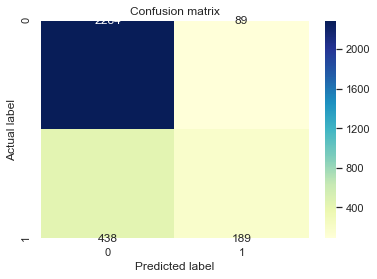

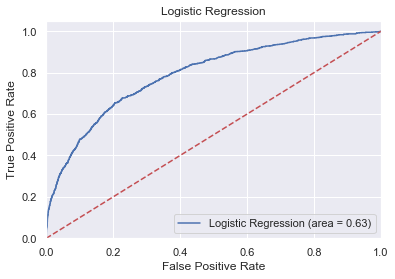

In [39]:
logistic = LogisticRegression()
model_fit(logistic,x_train,y_train,x_test,y_test,'Logistic Regression')

 Train Prediction  Accuracy : 0.8275714285714286
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5590
           1       0.66      0.30      0.41      1410

    accuracy                           0.83      7000
   macro avg       0.75      0.63      0.65      7000
weighted avg       0.81      0.83      0.80      7000

 Test Prediction Accuracy : 0.824
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2373
           1       0.68      0.30      0.42       627

    accuracy                           0.82      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.82      0.80      3000



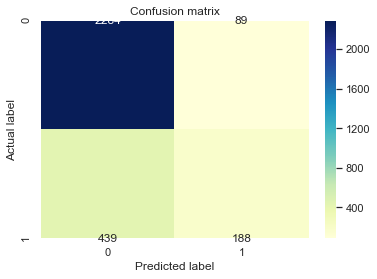

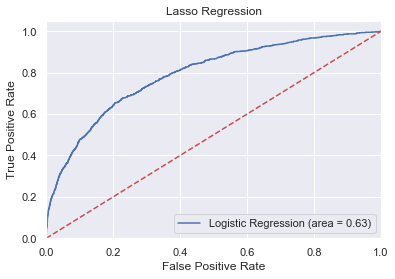

In [40]:
lasso = LogisticRegression(penalty='l1')
model_fit(lasso,x_train,y_train,x_test,y_test,'Lasso Regression')

 Train Prediction  Accuracy : 0.8277142857142857
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5590
           1       0.66      0.30      0.41      1410

    accuracy                           0.83      7000
   macro avg       0.75      0.63      0.65      7000
weighted avg       0.81      0.83      0.80      7000

 Test Prediction Accuracy : 0.8243333333333334
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2373
           1       0.68      0.30      0.42       627

    accuracy                           0.82      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.82      0.80      3000



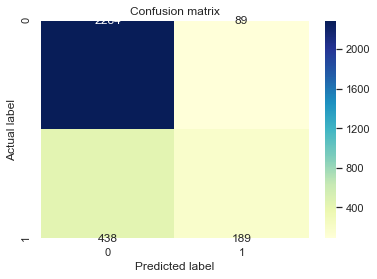

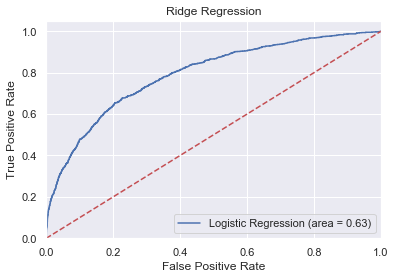

In [41]:
ridge = LogisticRegression(penalty='l2')
model_fit(ridge,x_train,y_train,x_test,y_test,'Ridge Regression')

 Train Prediction  Accuracy : 0.8178571428571428
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5590
           1       0.57      0.37      0.45      1410

    accuracy                           0.82      7000
   macro avg       0.71      0.65      0.67      7000
weighted avg       0.80      0.82      0.80      7000

 Test Prediction Accuracy : 0.8183333333333334
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2373
           1       0.60      0.39      0.47       627

    accuracy                           0.82      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



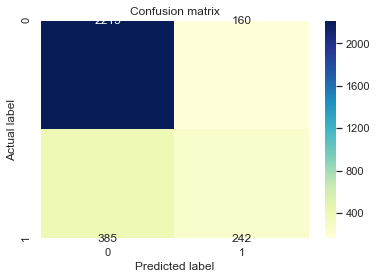

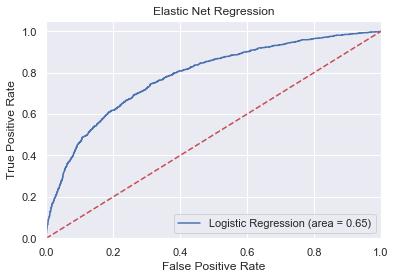

In [42]:
elasticnet = SGDClassifier(loss='log')
model_fit(elasticnet,x_train,y_train,x_test,y_test,'Elastic Net Regression')

 Train Prediction  Accuracy : 0.8804285714285714
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5590
           1       0.78      0.56      0.65      1410

    accuracy                           0.88      7000
   macro avg       0.84      0.76      0.79      7000
weighted avg       0.87      0.88      0.87      7000

 Test Prediction Accuracy : 0.8486666666666667
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2373
           1       0.70      0.49      0.57       627

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



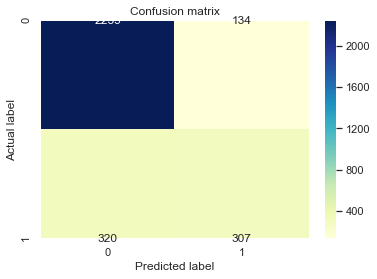

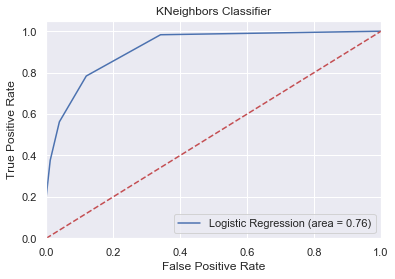

In [43]:
knn = KNeighborsClassifier()
model_fit(knn,x_train,y_train,x_test,y_test,'KNeighbors Classifier')

 Train Prediction  Accuracy : 0.8065714285714286
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5590
           1       0.53      0.30      0.39      1410

    accuracy                           0.81      7000
   macro avg       0.69      0.62      0.64      7000
weighted avg       0.78      0.81      0.78      7000

 Test Prediction Accuracy : 0.8053333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      2373
           1       0.56      0.31      0.40       627

    accuracy                           0.81      3000
   macro avg       0.70      0.62      0.64      3000
weighted avg       0.78      0.81      0.78      3000



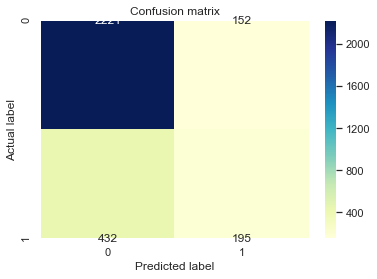

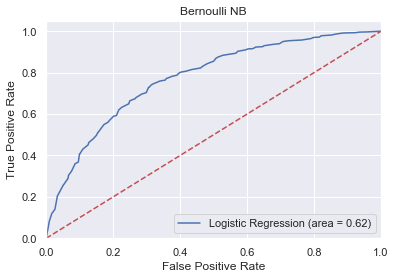

In [44]:
bnb = BernoulliNB()
model_fit(bnb,x_train,y_train,x_test,y_test,'Bernoulli NB')

 Train Prediction  Accuracy : 0.8157142857142857
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5590
           1       0.56      0.40      0.47      1410

    accuracy                           0.82      7000
   macro avg       0.71      0.66      0.68      7000
weighted avg       0.80      0.82      0.80      7000

 Test Prediction Accuracy : 0.81
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2373
           1       0.57      0.39      0.46       627

    accuracy                           0.81      3000
   macro avg       0.71      0.66      0.67      3000
weighted avg       0.79      0.81      0.80      3000



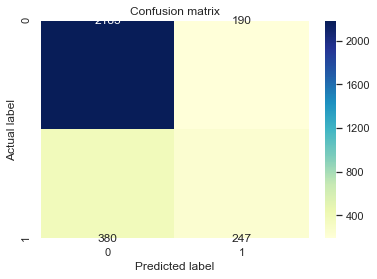

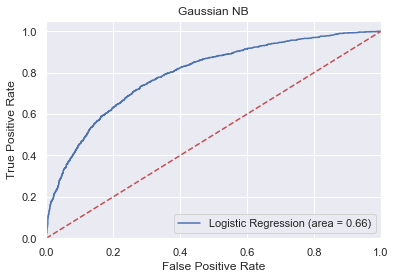

In [45]:
nb = GaussianNB()
model_fit(nb,x_train,y_train,x_test,y_test,'Gaussian NB')

 Train Prediction  Accuracy : 0.9767142857142858
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5590
           1       0.98      0.90      0.94      1410

    accuracy                           0.98      7000
   macro avg       0.98      0.95      0.96      7000
weighted avg       0.98      0.98      0.98      7000

 Test Prediction Accuracy : 0.7926666666666666
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2373
           1       0.50      0.49      0.50       627

    accuracy                           0.79      3000
   macro avg       0.69      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000



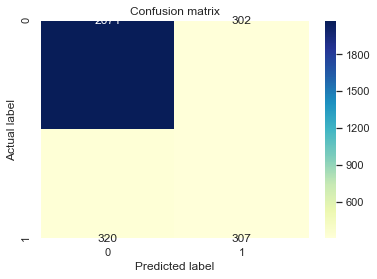

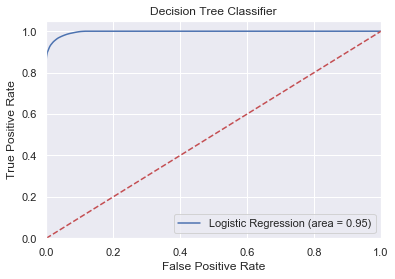

In [46]:
decision=DecisionTreeClassifier()
model_fit(decision,x_train,y_train,x_test,y_test,'Decision Tree Classifier')

 Train Prediction  Accuracy : 0.9615714285714285
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5590
           1       0.96      0.84      0.90      1410

    accuracy                           0.96      7000
   macro avg       0.96      0.92      0.94      7000
weighted avg       0.96      0.96      0.96      7000

 Test Prediction Accuracy : 0.8273333333333334
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2373
           1       0.62      0.45      0.52       627

    accuracy                           0.83      3000
   macro avg       0.74      0.69      0.71      3000
weighted avg       0.81      0.83      0.82      3000



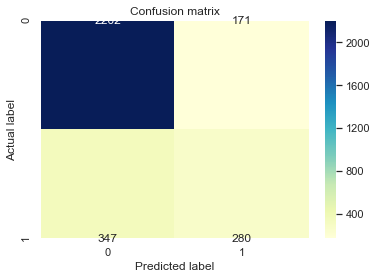

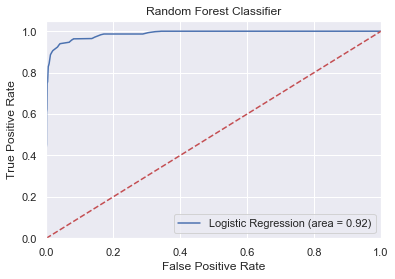

In [47]:
random=RandomForestClassifier()
model_fit(random,x_train,y_train,x_test,y_test,'Random Forest Classifier')

 Train Prediction  Accuracy : 0.8552857142857143
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5590
           1       0.72      0.46      0.56      1410

    accuracy                           0.86      7000
   macro avg       0.80      0.71      0.74      7000
weighted avg       0.84      0.86      0.84      7000

 Test Prediction Accuracy : 0.8506666666666667
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.73      0.45      0.56       627

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



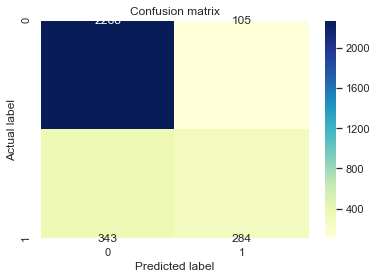

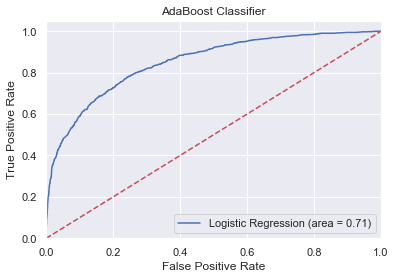

In [48]:
ada=AdaBoostClassifier()
model_fit(ada,x_train,y_train,x_test,y_test,'AdaBoost Classifier')

 Train Prediction  Accuracy : 0.8657142857142858
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5590
           1       0.78      0.46      0.58      1410

    accuracy                           0.87      7000
   macro avg       0.83      0.72      0.75      7000
weighted avg       0.86      0.87      0.85      7000

 Test Prediction Accuracy : 0.8586666666666667
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.78      0.45      0.57       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



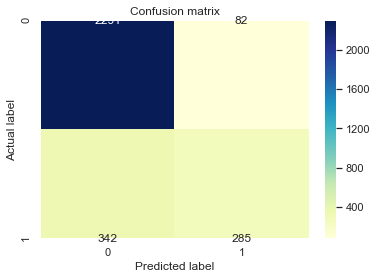

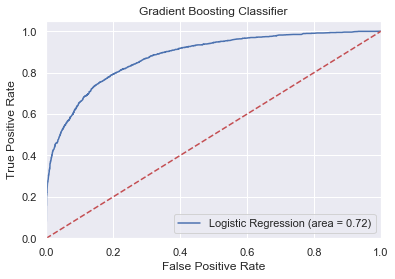

In [75]:
gd=GradientBoostingClassifier()
model_fit(gd,x_train,y_train,x_test,y_test,'Gradient Boosting Classifier')

 Train Prediction  Accuracy : 0.8655714285714285
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5590
           1       0.79      0.45      0.58      1410

    accuracy                           0.87      7000
   macro avg       0.83      0.71      0.75      7000
weighted avg       0.86      0.87      0.85      7000

 Test Prediction Accuracy : 0.857
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2373
           1       0.78      0.44      0.56       627

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



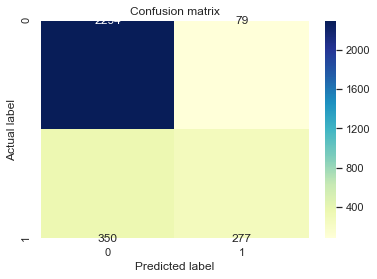

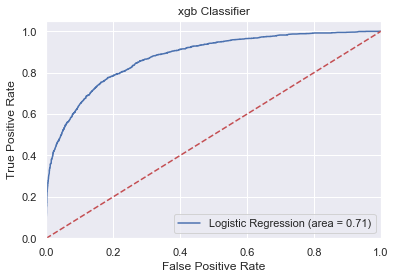

In [76]:
xgb=XGBClassifier()
model_fit(xgb,x_train,y_train,x_test,y_test,'xgb Classifier')

 Train Prediction  Accuracy : 0.8572857142857143
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5590
           1       0.83      0.36      0.51      1410

    accuracy                           0.86      7000
   macro avg       0.85      0.67      0.71      7000
weighted avg       0.85      0.86      0.83      7000

 Test Prediction Accuracy : 0.8533333333333334
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2373
           1       0.82      0.38      0.52       627

    accuracy                           0.85      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.85      0.83      3000



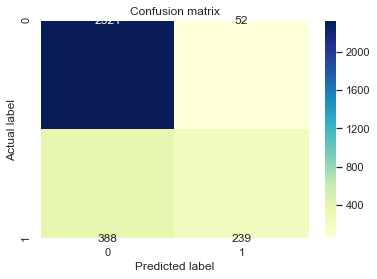

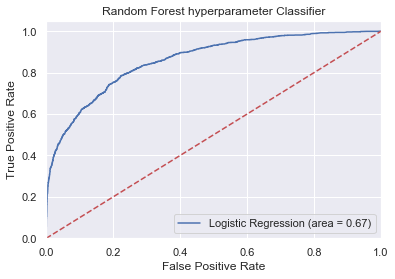

In [77]:
random=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_fit(random,x_train,y_train,x_test,y_test,'Random Forest hyperparameter Classifier')

 Train Prediction  Accuracy : 0.8207142857142857
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5590
           1       0.59      0.36      0.45      1410

    accuracy                           0.82      7000
   macro avg       0.72      0.65      0.67      7000
weighted avg       0.80      0.82      0.80      7000

 Test Prediction Accuracy : 0.8126666666666666
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2373
           1       0.58      0.36      0.45       627

    accuracy                           0.81      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.79      0.81      0.80      3000



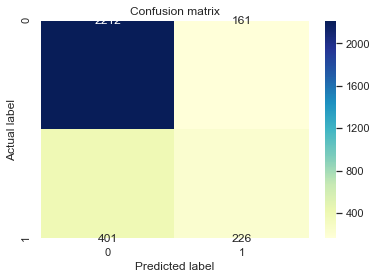

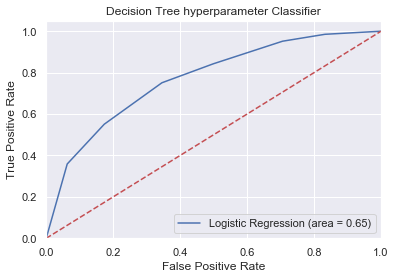

In [78]:
decision=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort=False,
                       random_state=None, splitter='best')
model_fit(decision,x_train,y_train,x_test,y_test,'Decision Tree hyperparameter Classifier')

 Train Prediction  Accuracy : 0.8827142857142857
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5590
           1       0.82      0.54      0.65      1410

    accuracy                           0.88      7000
   macro avg       0.85      0.75      0.79      7000
weighted avg       0.88      0.88      0.87      7000

 Test Prediction Accuracy : 0.8563333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.73      0.49      0.59       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.84      3000



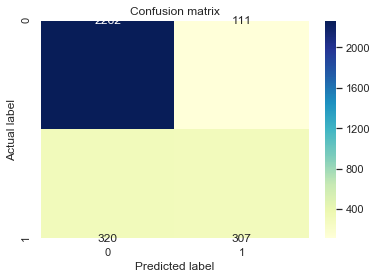

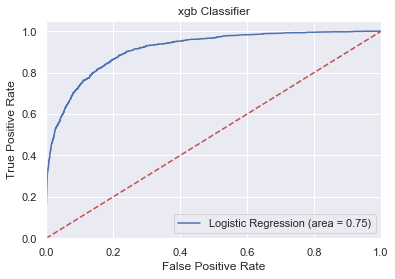

In [79]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate='0.05', max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
model_fit(xgb,x_train,y_train,x_test,y_test,'xgb Classifier')

In [80]:
def neural_network(train_X,train_Y,test_X,test_Y):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = x.shape[1]))
    classifier.add(Dropout(rate = 0.1))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    
     # Adding the third hidden layer
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    
     # Adding the four hidden layer
    classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compiling the ANN | means applying SGD on the whole ANN
    sgd = optimizers.SGD(lr = 0.001)
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    # Summary of the model
    classifier.summary()
    
    
    # Fitting the ANN to the Training set
    history = classifier.fit(train_X, train_Y, batch_size = 10, validation_split = 0.3, epochs = 100,verbose = 2)
    
    dtrain_predictions  = classifier.predict(train_X);
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'validation'], loc = 'upper left')
    plt.show()
    
    ### Predict training set:
    dtrain_predictions  = classifier.predict(train_X);
    dtrain_predictions = (dtrain_predictions > 0.5)
    train_accuracy=accuracy_score(train_Y,dtrain_predictions)
    results = classifier.evaluate(train_X, train_Y)
    print(' Train validation ', results[1])
    print(" Train Prediction Accuracy :",train_accuracy)
    print(classification_report(train_Y,dtrain_predictions))
    
    ### Predict test set:
    dtest_predictions = classifier.predict(test_X);
    dtest_predictions = (dtest_predictions > 0.5)
    test_accuracy=accuracy_score(test_Y,dtest_predictions)
    results = classifier.evaluate(test_X, test_Y)
    print(' Test validation  ', results[1])
    print(" Test Prediction Accuracy :",test_accuracy)
    print(classification_report(test_Y,dtest_predictions))
    
    ## Confusion Matrix
    cm = confusion_matrix(test_Y, dtest_predictions)
    p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    
    f1_score_train.append(train_accuracy)
    f1_score_test.append(test_accuracy)
    algorithm_name.append("Artifical Neural Network")   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Epoch 71/100
 - 1s - loss: 0.3890 - accuracy: 0.8290 - val_loss: 0.3673 - val_accuracy: 0.8376
Epoch 72/100
 - 1s - loss: 0.3828 - accuracy: 0.8376 - val_loss: 0.3597 - val_accuracy: 0.8395
Epoch 73/100
 - 1s - loss: 0.3822 - accuracy: 0.8347 - val_loss: 0.3589 - val_accuracy: 0.8367
Epoch 74/100
 - 1s - loss: 0.3778 - accuracy: 0.8365 - val_loss: 0.3557 - val_accuracy: 0.8481
Epoch 75/100
 - 1s - loss: 0.3771 - accuracy: 0.8386 - val_loss: 0.3519 - val_accuracy: 0.8486
Epoch 76/100
 - 1s - loss: 0.3755 - accuracy: 0.8384 - val_loss: 0.3481 - val_accuracy: 0.8524
Epoch 77/100
 - 1s - loss: 0.3722 - accuracy: 0.8410 - val_loss: 0.3532 - val_accuracy: 0.8476
Epoch 78/100
 - 1s - loss: 0.3732 - accuracy: 0.8422 - val_loss: 0.3465 - val_accuracy: 0.8457
Epoch 79/100
 - 1s - loss: 0.3743 - accuracy: 0.8400 - val_loss: 0.3524 - val_accuracy: 0.8529
Epoch 80/100
 - 1s - loss: 0.3698 - accuracy: 0.8443 - val_loss: 0.3480 - val_accuracy: 0.8495
Epoch 81/100
 - 1s - loss: 0.3696 - accuracy: 0.84

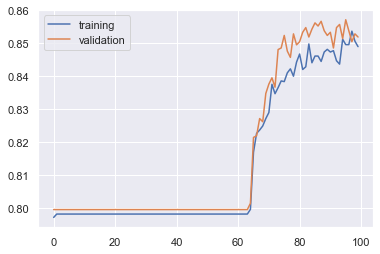

7000/7000 [==============================] - 0s 21us/step
 Train validation  0.8539999723434448
 Train Prediction Accuracy : 0.854
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5590
           1       0.75      0.41      0.53      1410

    accuracy                           0.85      7000
   macro avg       0.81      0.69      0.72      7000
weighted avg       0.84      0.85      0.84      7000

3000/3000 [==============================] - 0s 23us/step
 Test validation   0.8533333539962769
 Test Prediction Accuracy : 0.8533333333333334
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2373
           1       0.77      0.43      0.55       627

    accuracy                           0.85      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



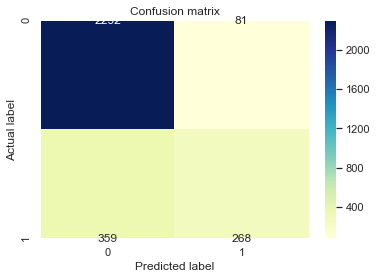

In [81]:
neural_network(x_train,y_train,x_test,y_test)

## Final Result

In [82]:
def finalResult():
    result = pd.DataFrame([algorithm_name,f1_score_train,f1_score_test]).T
    result.columns = ["Model_Name", "Train", "Test"]
    result.to_excel('Model.xlsx',index=False)
    return result;

In [83]:
result = finalResult()

In [84]:
result.sort_values(by='Train', ascending=False, na_position='first')

,Model_Name,Train,Test
7,Decision Tree Classifier,0.976714,0.792667
8,Random Forest Classifier,0.961571,0.827333
10,xgb Classifier,0.882714,0.856333
17,xgb Classifier,0.882714,0.856333
4,KNeighbors Classifier,0.880429,0.848667
13,Gradient Boosting Classifier,0.865714,0.858667
14,xgb Classifier,0.865571,0.857
15,Random Forest hyperparameter Classifier,0.857286,0.853333
12,Random Forest hyperparameter Classifier,0.856857,0.852667
9,AdaBoost Classifier,0.855286,0.850667


In [ ]:
plt.figure(figsize=(15,7)) 
sns.barplot(result['Model_Name'], result['Train']);
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.yticks(fontsize=12) # Larger tick labels
plt.xticks(fontsize=12)
plt.show()

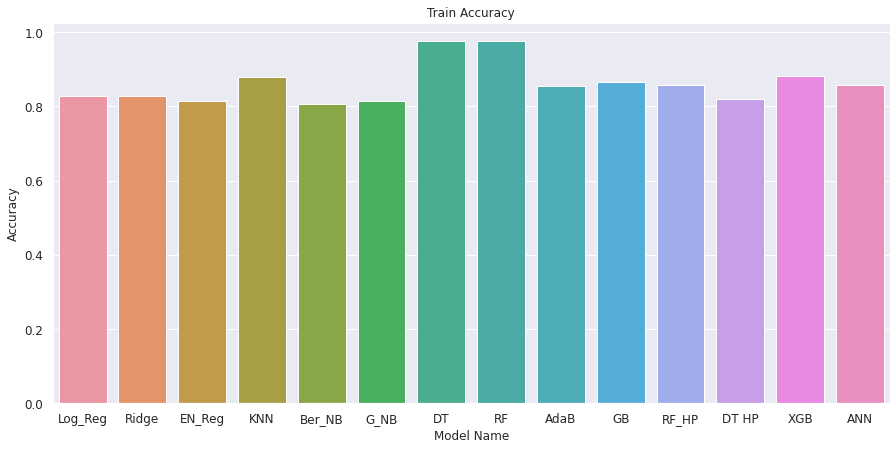

In [ ]:
plt.figure(figsize=(100,30)) 
sns.barplot(result['Model_Name'], result['Test']);
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model Name')
plt.yticks(fontsize=12) # Larger tick labels
plt.xticks(fontsize=12)
plt.show()

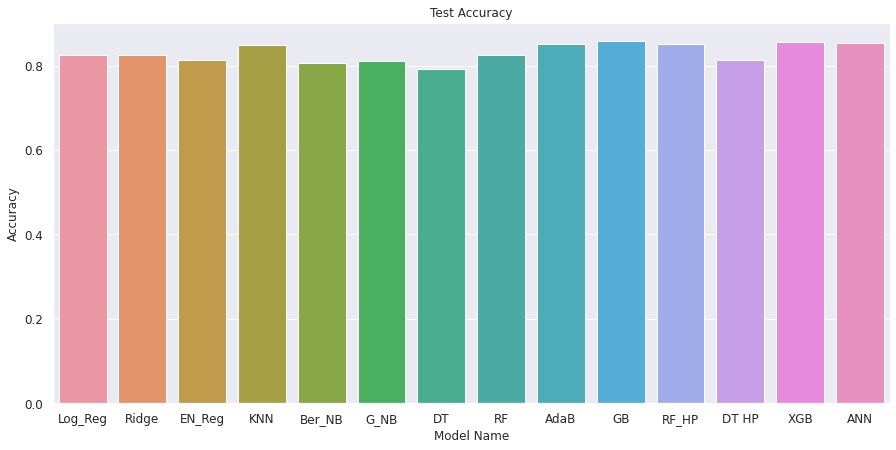

## HyperTunning

In [50]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

In [52]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [53]:
classifier=XGBClassifier()

In [54]:
random_search=RandomizedSearchCV(classifier,param_distributions=random_grid,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [55]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 26.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
        

In [56]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate='0.05', max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [57]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 400,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': '0.05'}

 Train Prediction  Accuracy : 0.8827142857142857
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5590
           1       0.82      0.54      0.65      1410

    accuracy                           0.88      7000
   macro avg       0.85      0.75      0.79      7000
weighted avg       0.88      0.88      0.87      7000

 Test Prediction Accuracy : 0.8563333333333333
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.73      0.49      0.59       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.84      3000



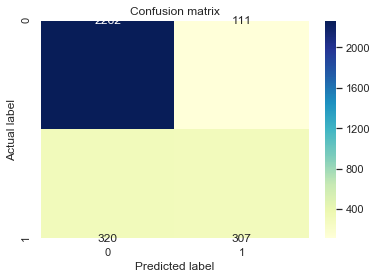

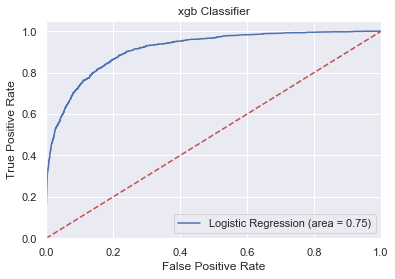

In [58]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate='0.05', max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
model_fit(xgb,x_train,y_train,x_test,y_test,'xgb Classifier')

In [59]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [60]:
dtree=DecisionTreeClassifier()

In [61]:
random_search=RandomizedSearchCV(dtree,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [62]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [63]:
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort=False,
                       random_state=None, splitter='best')

In [64]:
random_search.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.1,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 4}

 Train Prediction  Accuracy : 0.8207142857142857
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5590
           1       0.59      0.36      0.45      1410

    accuracy                           0.82      7000
   macro avg       0.72      0.65      0.67      7000
weighted avg       0.80      0.82      0.80      7000

 Test Prediction Accuracy : 0.8126666666666666
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2373
           1       0.58      0.36      0.45       627

    accuracy                           0.81      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.79      0.81      0.80      3000



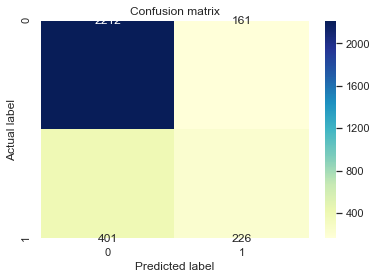

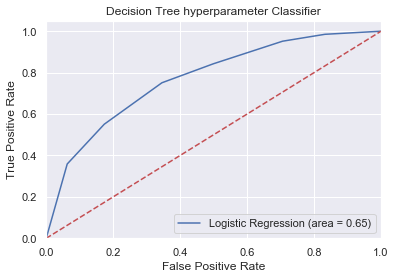

In [65]:
decision=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, presort=False,
                       random_state=None, splitter='best')
model_fit(decision,x_train,y_train,x_test,y_test,'Decision Tree hyperparameter Classifier')

In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_features =["auto","sqrt","log2"]

In [67]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'max_features': max_features}

In [68]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt', 'log2']}


In [69]:
random=RandomForestClassifier()

In [70]:
random_search=RandomizedSearchCV(random,param_distributions=random_grid,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [71]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 12.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [72]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
random_search.best_params_

{'n_estimators': 700,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'entropy'}

 Train Prediction  Accuracy : 0.8568571428571429
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5590
           1       0.84      0.36      0.50      1410

    accuracy                           0.86      7000
   macro avg       0.85      0.67      0.71      7000
weighted avg       0.85      0.86      0.83      7000

 Test Prediction Accuracy : 0.8526666666666667
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2373
           1       0.82      0.38      0.52       627

    accuracy                           0.85      3000
   macro avg       0.84      0.68      0.71      3000
weighted avg       0.85      0.85      0.83      3000



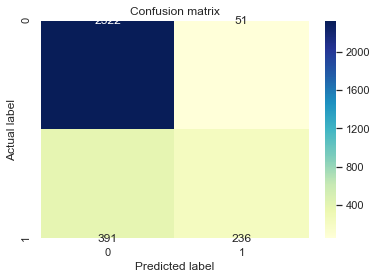

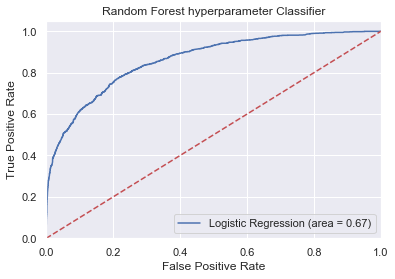

In [74]:
random=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model_fit(random,x_train,y_train,x_test,y_test,'Random Forest hyperparameter Classifier')